# Water supply vs Population (LA Region)

The datasets in this kernel where originally used for CSUN's data jam competition for the 2018 year. The population dataset was downloaded from worldpopulationreview.com and contains population, growth and growth rate data from 1970-2017. It is important to note, since population data is normally gathered every ten years then for the years 1970-2010 we do not have population data for each year in the population dataset. However, we do have population data for each successive year from 2010-2017 in the dataset. The next dataset comes from LADWP and contains data of water supply in the LA region. The total water supply has four main sources which are MWD (metropolitan water district), the LA Aqueduct, Local gwound water and recycled water.   

In [3]:
#Water supply vs. Population 
getwd()
setwd('c:/users/ledin/Desktop/R files')
#Population dataset (1970-2017)
dataset = read.csv(file = 'population.csv', stringsAsFactors = TRUE, header = TRUE)
colnames(dataset) = c('Years', 'Population', 'Growth', 'rate')

[1] "C:/Users/ledin/Desktop/R files"

In [4]:
head(dataset)

Years,Population,Growth,rate
2017,"3,999,759","18,643",0.47%
2016,"3,981,116","27,657",0.70%
2015,"3,953,459","30,791",0.78%
2014,"3,922,668","30,885",0.79%
2013,"3,891,783","32,516",0.84%
2012,"3,859,267","34,675",0.91%


In [5]:
dataset$Population <- gsub(",","", dataset$Population)
dataset$Population = as.numeric(dataset$Population)
dataset$Population

dataset$Growth <- gsub(",","",dataset$Growth)
dataset$Growth <- as.numeric(dataset$Growth)
dataset$Growth

dataset$rate <- gsub("%","",dataset$rate)
dataset$rate <- as.numeric(dataset$rate)
dataset$rate

dataset$Years <- as.factor(dataset$Years)
dataset$Years

[1] 3999759 3981116 3953459 3922668 3891783 3859267 3824592 3796060 3694820
[10] 3485398 2968579 2811801

[1]  18643  27657  30791  30885  32516  34675  28532 101240 209422 516819
[11] 156778 332786

[1] 0.47 0.70 0.78 0.79 0.84 0.91 0.75 0.27 0.59 1.62 0.54 1.27

[1] 2017 2016 2015 2014 2013 2012 2011 2010 2000 1990 1980 1970
Levels: 1970 1980 1990 2000 2010 2011 2012 2013 2014 2015 2016 2017

In [6]:
str(dataset)
summary(dataset)

'data.frame':	12 obs. of  4 variables:
 $ Years     : Factor w/ 12 levels "1970","1980",..: 12 11 10 9 8 7 6 5 4 3 ...
 $ Population: num  3999759 3981116 3953459 3922668 3891783 ...
 $ Growth    : num  18643 27657 30791 30885 32516 ...
 $ rate      : num  0.47 0.7 0.78 0.79 0.84 0.91 0.75 0.27 0.59 1.62 ...


     Years     Population          Growth            rate       
 1970   :1   Min.   :2811801   Min.   : 18643   Min.   :0.2700  
 1980   :1   1st Qu.:3642464   1st Qu.: 30226   1st Qu.:0.5775  
 1990   :1   Median :3841930   Median : 33596   Median :0.7650  
 2000   :1   Mean   :3682442   Mean   :126729   Mean   :0.7942  
 2010   :1   3rd Qu.:3930366   3rd Qu.:169939   3rd Qu.:0.8575  
 2011   :1   Max.   :3999759   Max.   :516819   Max.   :1.6200  
 (Other):6                                                      

In [7]:
lm.fit <- lm(Population ~ Growth, data = dataset) 
summary(lm.fit)


Call:
lm(formula = Population ~ Growth, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-664602   14731   77469  137228  442449 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.890e+06  1.201e+05  32.380 1.86e-11 ***
Growth      -1.639e+00  6.119e-01  -2.679   0.0231 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 317900 on 10 degrees of freedom
Multiple R-squared:  0.4179,	Adjusted R-squared:  0.3596 
F-statistic: 7.178 on 1 and 10 DF,  p-value: 0.02313


$stats
[1] 0.270 0.565 0.765 0.875 1.270

$n
[1] 12

$conf
[1] 0.6236069 0.9063931

$out
[1] 1.62

[1] "The population mean growth rate from 1970-2017 is  0.794166666666667"

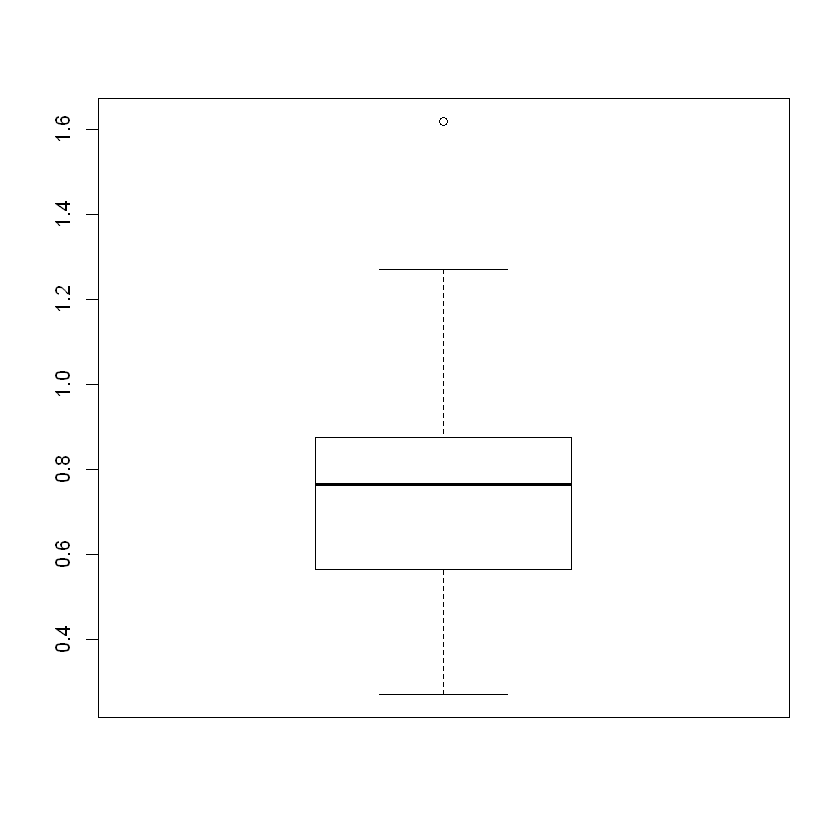

In [8]:
boxplot(dataset$rate)
boxplot.stats(dataset$rate)
mean_rate <- mean(dataset$rate)
paste('The population mean growth rate from 1970-2017 is ', mean_rate)

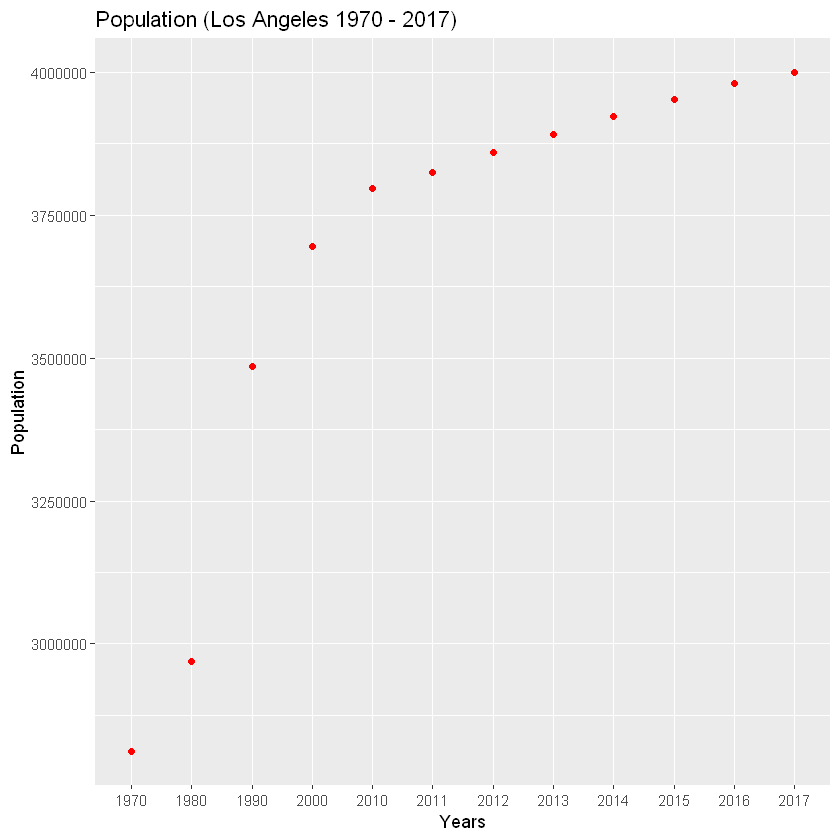

In [9]:
library(ggplot2)
p <- ggplot(data = dataset)
p + geom_point(aes(x = dataset$Years, y = dataset$Population), colour = 'red') + 
  xlab('Years') + ylab('Population') +
ggtitle("Population (Los Angeles 1970 - 2017)")

In [30]:
pop_1 <- dataset$Population[12]
pop_2 <- dataset$Population[1]
paste("Population in 1970: ", pop_1)
paste("Population in 2017: ", pop_2)

[1] "Population in 1970:  2811801"

[1] "Population in 2017:  3999759"

The overall population in the Los Angeles region has continued to grow since 1970. Standing at about 4 million in 2017, the overall population has seen no sign of declining for the later years. 

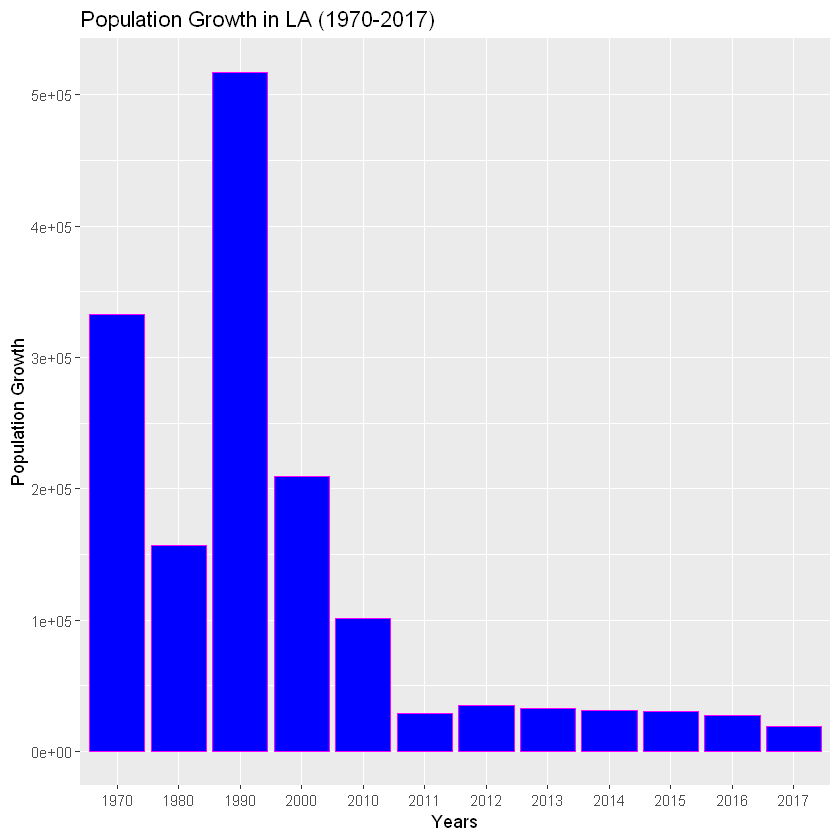

In [10]:
p + geom_col(aes(x = dataset$Years, y = dataset$Growth),
             fill = 'blue',colour = 'magenta') + 
          xlab('Years') + ylab('Population Growth') +
            ggtitle("Population Growth in LA (1970-2017)")

In [38]:
pop_g = dataset$Growth[1]+dataset$Growth[2]+dataset$Growth[3]+dataset$Growth[4]+dataset$Growth[5]+dataset$Growth[6]+dataset$Growth[7]
paste("Population Growth for 2011-2017:", pop_g)

[1] "Population Growth for 2011-2017: 203699"

[1] "516819"

In [11]:
#Water Supply
supply <- read.csv('LADWP_Water_Supply_in_Acre_Feet.csv')
head(supply)

ï..Date.Value,Fiscal.Year,MWD,LA.Aqueduct,Local.Groundwater,Recycled.Water,Total.Acre.Feet,MWD...of.Total,LA.Aqueduct...of.Total,Local.Groundwater...of.Total,Recycled.Water...of.Total
06/30/1970 12:00:00 AM,1969-70,"146,981","355,422","83,627",0,"586,030",25.1%,60.6%,14.3%,0%
06/30/1971 12:00:00 AM,1970-71,"52,194","454,160","73,847",0,"580,201",9%,78.3%,12.7%,0%
06/30/1972 12:00:00 AM,1971-72,"59,852","469,185","75,033",0,"604,070",9.9%,77.7%,12.4%,0%
06/30/1973 12:00:00 AM,1972-73,"32,766","458,726","79,726",0,"571,218",5.7%,80.3%,14%,0%
06/30/1974 12:00:00 AM,1973-74,"25,525","460,942","76,517",0,"562,984",4.5%,81.9%,13.6%,0%
06/30/1975 12:00:00 AM,1974-75,"32,611","459,655","76,253",0,"568,519",5.7%,80.9%,13.4%,0%


In [12]:
colnames(supply) <- c('Date','Year','MWD','Aqueduct','GroundWater','RecycledWater',
                      'TotalSupply','MWD_Per','Aqueduct_Per','Ground_Per','Recycled_Per')
head(supply)

Date,Year,MWD,Aqueduct,GroundWater,RecycledWater,TotalSupply,MWD_Per,Aqueduct_Per,Ground_Per,Recycled_Per
06/30/1970 12:00:00 AM,1969-70,"146,981","355,422","83,627",0,"586,030",25.1%,60.6%,14.3%,0%
06/30/1971 12:00:00 AM,1970-71,"52,194","454,160","73,847",0,"580,201",9%,78.3%,12.7%,0%
06/30/1972 12:00:00 AM,1971-72,"59,852","469,185","75,033",0,"604,070",9.9%,77.7%,12.4%,0%
06/30/1973 12:00:00 AM,1972-73,"32,766","458,726","79,726",0,"571,218",5.7%,80.3%,14%,0%
06/30/1974 12:00:00 AM,1973-74,"25,525","460,942","76,517",0,"562,984",4.5%,81.9%,13.6%,0%
06/30/1975 12:00:00 AM,1974-75,"32,611","459,655","76,253",0,"568,519",5.7%,80.9%,13.4%,0%


In [13]:
tail(supply)

,Date,Year,MWD,Aqueduct,GroundWater,RecycledWater,TotalSupply,MWD_Per,Aqueduct_Per,Ground_Per,Recycled_Per
43,06/30/2013 12:00:00 AM,2012-13,"388,402","113,411","57,246","7,513","566,572",68.6%,20%,10.1%,1.3%
44,06/30/2015 12:00:00 AM,2014-15,"362,607","57,535","90,438","10,421","521,001",69.6%,11%,17.4%,2%
45,06/30/2016 12:00:00 AM,2015-16,"339,906","57,859","79,056","9,913","486,734",69.8%,11.9%,16.2%,2%
46,06/30/2014 12:00:00 AM,2013-14,"441,871","61,024","79,403","10,054","592,352",75%,10%,13%,2%
47,06/30/1989 12:00:00 AM,1988-89,"230,149","327,181","136,376",0,"693,706",33.2%,47.2%,19.7%,0%
48,06/30/2017 12:00:00 AM,2016-17,"219,727","212,607","51,240","8,030","491,604",45%,43%,10%,2%


In [14]:
#Sorting supply dataset by Year
supply <- supply[order(supply$Year),]
tail(supply)

,Date,Year,MWD,Aqueduct,GroundWater,RecycledWater,TotalSupply,MWD_Per,Aqueduct_Per,Ground_Per,Recycled_Per
42,06/30/2012 12:00:00 AM,2011-12,"209,746","266,634","61,060","6,850","544,290",38.5%,49%,11.2%,1.3%
43,06/30/2013 12:00:00 AM,2012-13,"388,402","113,411","57,246","7,513","566,572",68.6%,20%,10.1%,1.3%
46,06/30/2014 12:00:00 AM,2013-14,"441,871","61,024","79,403","10,054","592,352",75%,10%,13%,2%
44,06/30/2015 12:00:00 AM,2014-15,"362,607","57,535","90,438","10,421","521,001",69.6%,11%,17.4%,2%
45,06/30/2016 12:00:00 AM,2015-16,"339,906","57,859","79,056","9,913","486,734",69.8%,11.9%,16.2%,2%
48,06/30/2017 12:00:00 AM,2016-17,"219,727","212,607","51,240","8,030","491,604",45%,43%,10%,2%


In [15]:
#Data ceaning
supply$Date <- NULL

supply$MWD <- gsub(",","",supply$MWD)
supply$MWD <- as.numeric(supply$MWD)
supply$Aqueduct <- gsub(",","",supply$Aqueduct)
supply$Aqueduct <- as.numeric(supply$Aqueduct)
supply$GroundWater <- gsub(",","",supply$GroundWater)
supply$GroundWater <- as.numeric(supply$GroundWater)
supply$RecycledWater <- gsub(",","",supply$RecycledWater)
supply$RecycledWater <- as.numeric(supply$RecycledWater)
supply$TotalSupply <- gsub(",","",supply$TotalSupply)
supply$TotalSupply <- as.numeric(supply$TotalSupply)

supply$MWD_Per <- gsub("%","",supply$MWD_Per)
supply$MWD_Per <- as.numeric(supply$MWD_Per)
supply$Aqueduct_Per <- gsub("%","",supply$Aqueduct_Per)
supply$Aqueduct_Per <- as.numeric(supply$Aqueduct_Per)
supply$Ground_Per <- gsub("%","",supply$Ground_Per)
supply$Ground_Per <- as.numeric(supply$Ground_Per)
supply$Recycled_Per <- gsub("%","",supply$Recycled_Per)
supply$Recycled_Per <- as.numeric(supply$Recycled_Per)

In [16]:
str(supply)
summary(supply)

'data.frame':	48 obs. of  10 variables:
 $ Year         : Factor w/ 48 levels "1969-70","1970-71",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ MWD          : num  146981 52194 59852 32766 25525 ...
 $ Aqueduct     : num  355422 454160 469185 458726 460942 ...
 $ GroundWater  : num  83627 73847 75033 79726 76517 ...
 $ RecycledWater: num  0 0 0 0 0 0 0 0 0 0 ...
 $ TotalSupply  : num  586030 580201 604070 571218 562984 ...
 $ MWD_Per      : num  25.1 9 9.9 5.7 4.5 5.7 4.1 18.9 9.2 3.2 ...
 $ Aqueduct_Per : num  60.6 78.3 77.7 80.3 81.9 80.9 76.8 58 72.3 85.3 ...
 $ Ground_Per   : num  14.3 12.7 12.4 14 13.6 13.4 19.1 23 18.5 11.6 ...
 $ Recycled_Per : num  0 0 0 0 0 0 0 0 0 0 ...


      Year         MWD            Aqueduct       GroundWater    
 1969-70: 1   Min.   : 18661   Min.   : 57535   Min.   : 30453  
 1970-71: 1   1st Qu.: 50726   1st Qu.:213152   1st Qu.: 72756  
 1971-72: 1   Median :181503   Median :330279   Median : 85981  
 1972-73: 1   Mean   :192012   Mean   :325971   Mean   : 87147  
 1973-74: 1   3rd Qu.:336161   3rd Qu.:462280   3rd Qu.: 99693  
 1974-75: 1   Max.   :441871   Max.   :531729   Max.   :136376  
 (Other):42                                                     
 RecycledWater      TotalSupply        MWD_Per       Aqueduct_Per  
 Min.   :    0.0   Min.   :486734   Min.   : 3.20   Min.   :10.00  
 1st Qu.:    0.0   1st Qu.:573563   1st Qu.: 9.15   1st Qu.:35.45  
 Median :  746.5   Median :608390   Median :32.25   Median :57.95  
 Mean   : 2225.1   Mean   :607354   Mean   :31.78   Mean   :53.51  
 3rd Qu.: 2060.2   3rd Qu.:650690   3rd Qu.:51.92   3rd Qu.:76.28  
 Max.   :10421.0   Max.   :703189   Max.   :75.00   Max.   :85.30  
    

In [17]:
library(plotrix)
slices <- c(mean(supply$MWD_Per), mean(supply$Aqueduct_Per),
            mean(supply$Ground_Per), mean(supply$Recycled_Per))
lbls <- c('Mwd', 'LA\n Aqueduct','Ground\n Water', 'Recycled\n Water')

Warning message:
"package 'plotrix' was built under R version 3.5.2"

Warning message in plot.window(...):
""labelrad" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""labelrad" is not a graphical parameter"Warning message in title(...):
""labelrad" is not a graphical parameter"

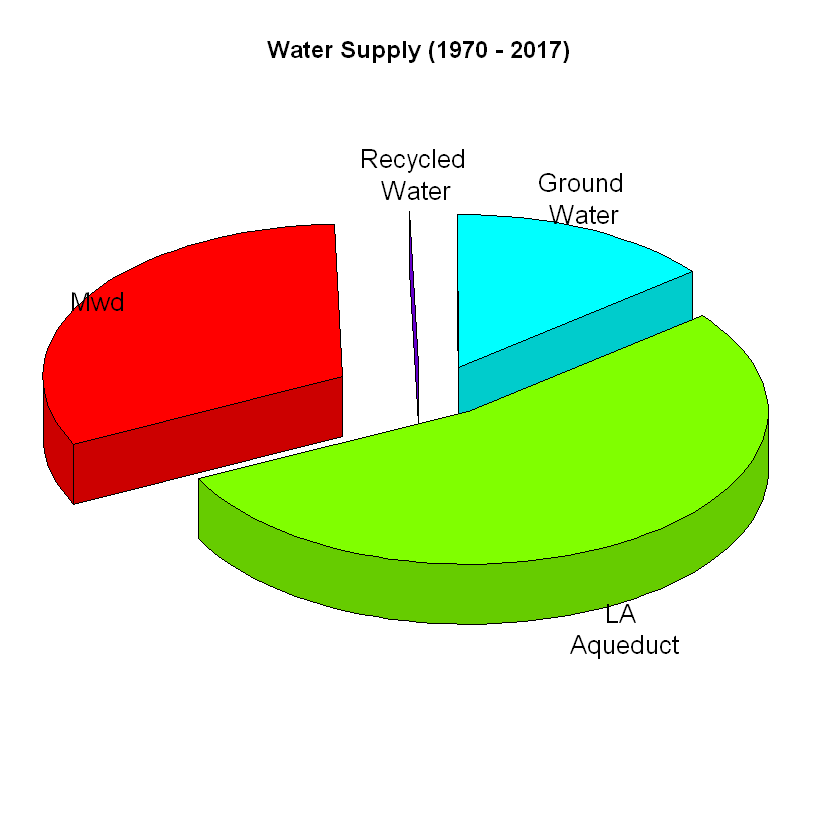

In [18]:
pie3D(slices, labels = lbls, radius = 1, 
      labelcex=1.3, labelrad=1.4, theta=0.8,start=1.6,
      explode = 0.3, main = 'Water Supply (1970 - 2017)')

Since 1970, the LA Aqueduct has accounted for over 53% of the overall water supply in the Los Angeles region.

In [19]:
Avg_list <- list('MWD' = round(mean(supply$MWD_Per),digits = 5),
                 'LA_Aqueduct' = round(mean(supply$Aqueduct_Per),digits = 5),
                 'Ground_Water' = round(mean(supply$Ground_Per),digits = 5),
                 'Recycled_Water' = round(mean(supply$Recycled_Per),digits = 5))
print(Avg_list)

$MWD
[1] 31.78333

$LA_Aqueduct
[1] 53.50625

$Ground_Water
[1] 14.29583

$Recycled_Water
[1] 0.40208



Warning message:
"package 'vioplot' was built under R version 3.5.2"Loading required package: sm
Warning message:
"package 'sm' was built under R version 3.5.2"Package 'sm', version 2.2-5.6: type help(sm) for summary information


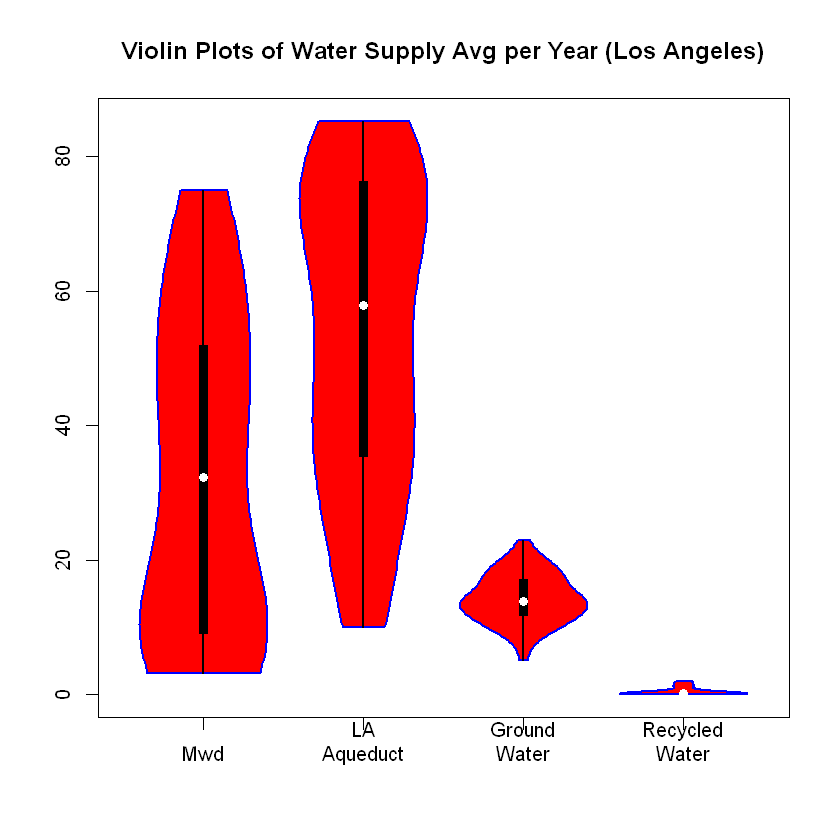

In [20]:
library(vioplot)
x1 <- supply$MWD_Per
x2 <- supply$Aqueduct_Per
x3 <- supply$Ground_Per
x4 <- supply$Recycled_Per
vioplot(x1,x2,x3,x4,
        names = c('Mwd','LA\nAqueduct','Ground\nWater','Recycled\nWater'),
        col = "red",border = "blue",lty=1,lwd=2)
title("Violin Plots of Water Supply Avg per Year (Los Angeles)")

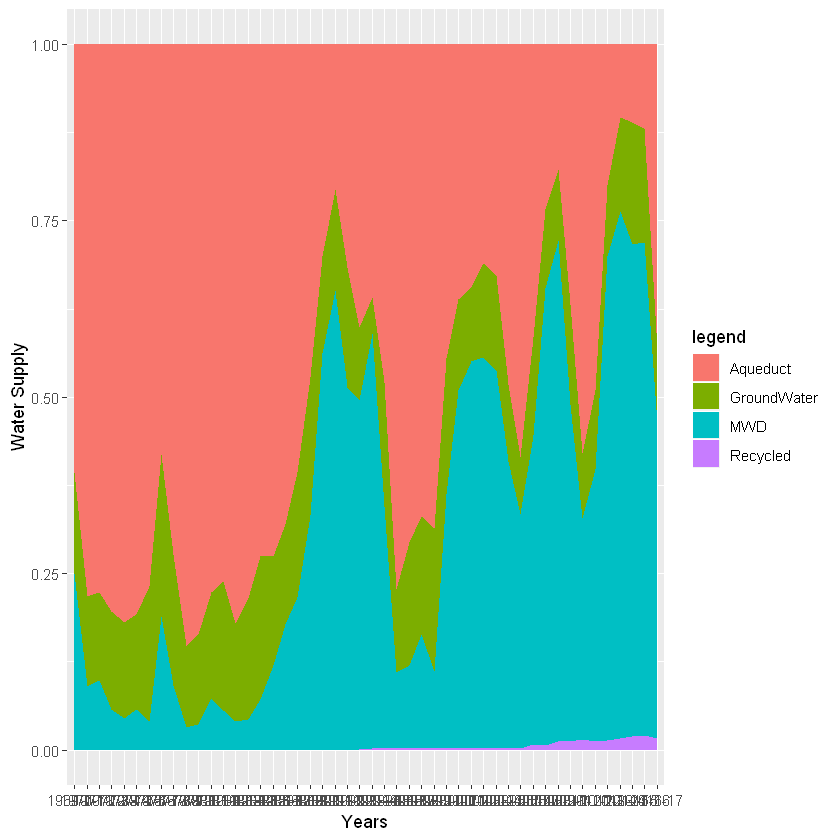

In [39]:
library(ggplot2)

legend <- rep(c("MWD","Aqueduct","GroundWater","Recycled"))
new_values <- as.numeric(t(supply[,2:5]))
age <- rep(supply$Year, each = 4)
new_data <- data.frame(legend,age,new_values)

ggplot(new_data, aes(x = age, y = new_values, group = legend, fill = legend)) + 
  geom_area(position = "fill") +
  xlab("Years") + ylab("Water Supply")

Major droughts throughout the years since 1970 have played a significant role in the overall water supply in the LA region. It can be seen that everytime the Aqueduct begins to run dry due to droughts then the LA region must recieve more water supply from the Metropolitan Water District. Recycled water does not play a major significance in the overall water supply since in 2017 recycled water accounted for 2% of the overall wtaer supply for the LA region.